In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.tseries import offsets
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullLocator)
import matplotlib.dates as mdates

In [2]:
csv_opts = {'sep': '|',
            'quotechar': '"',
            'compression': 'gzip',
            'encoding': 'utf-8'}

In [3]:
df = pd.read_csv('../input/2018-ICFO-00515 Highlighted_EDIT.csv.gz', **csv_opts)

In [4]:
df.columns

Index(['Tracking Number', 'Alien Number', 'Last Name', 'First Name', 'Gender',
       'Date of Birth', 'Country of Citizenship', 'Facility AOR', 'Facility',
       'Facility:DETLOC', 'Report Type', 'Placement Date', 'Placement Reason',
       'Release Date', 'Length of Stay', 'Disciplinary Infraction',
       'Sanction Length', 'Detailed Reason', 'Attorney of Record',
       'Attorney Notification', 'Detainee Request',
       'Compliance with Detention Standards', 'Mental Illness',
       'Serious Medical Illness', 'Serious Disability', 'Ever SMI?',
       'FO Recommendation', 'Additional Comments Export',
       'Non Compliance Detail', 'Special Criteria', 'ID', 'Current Review',
       'Created', 'LGBTI', 'Item Type', 'Path'],
      dtype='object')

In [5]:
df.head()

,Tracking Number,Alien Number,Last Name,First Name,Gender,Date of Birth,Country of Citizenship,Facility AOR,Facility,Facility:DETLOC,...,FO Recommendation,Additional Comments Export,Non Compliance Detail,Special Criteria,ID,Current Review,Created,LGBTI,Item Type,Path
0,12442,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",MOROCCO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,...,NaN,05/23/2018 05/14/2018 Detainee is under medica...,NaN,Yes,12442,14.0,5/23/2018,NaN,Item,(b)(7)(E)
1,12439,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",ERITREA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,...,Detainee has been housed in all available hous...,05/22/2018 Detainee has been housed in all ava...,NaN,No,12439,14.0,5/22/2018,NaN,Item,(b)(7)(E)
2,12438,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",INDIA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,...,NaN,05/23/2018 Detainee placed in RHU pending SAAP...,NaN,Yes,12438,14.0,5/22/2018,NaN,Item,(b)(7)(E)
3,12437,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",RUSSIA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,...,Detainee had hazardous items in his possession...,05/23/2018 Detainee placed in RHU pending IDP ...,NaN,Yes,12437,14.0,5/22/2018,NaN,Item,(b)(7)(E)
4,12436,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Female,"(b)(6), (b)(7)(c )",MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,...,Detainee's actions were deliberate and unprovo...,05/23/2018 Detainee returned from medical on 0...,NaN,Yes,12436,30.0,5/22/2018,NaN,Item,(b)(7)(E)


In [6]:
df['start_dt'] = pd.to_datetime(df['Placement Date'])
df['end_dt'] = pd.to_datetime(df['Release Date'])

In [7]:
assert sum(df['start_dt'].isnull()) == 0

In [8]:
sum(df['end_dt'].isnull())

14

In [9]:
min_date = df['start_dt'].min()
max_date = df['end_dt'].max()
print(min_date, max_date)

2013-05-13 00:00:00 2018-05-31 00:00:00


In [10]:
g = df.set_index('start_dt').groupby(pd.Grouper(freq='A'))

In [11]:
fy_count = g['Tracking Number'].nunique()

In [12]:
fy_count.index = fy_count.index.year

In [13]:
fy_count

start_dt
2013    60
2014    82
2015    76
2016    42
2017    74
2018    37
Name: Tracking Number, dtype: int64

In [14]:
len(set(df['Tracking Number']))

371

In [15]:
data = df.set_index('start_dt').groupby(pd.Grouper(freq='M'))['Tracking Number'].count()

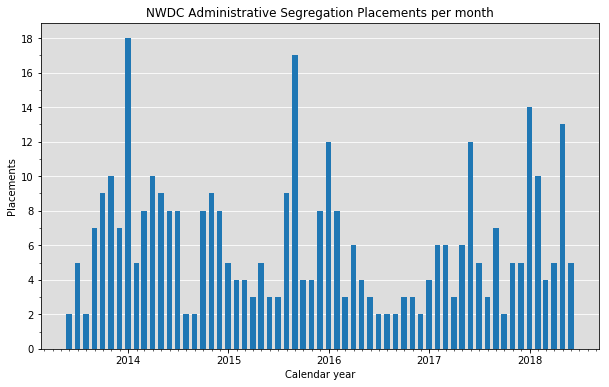

In [16]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')
ax.bar(data.index, data, width=20)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.title('NWDC Administrative Segregation Placements per month')
plt.ylabel('Placements')
plt.xlabel('Calendar year')

plt.show()

## Time in solitary

In [17]:
# df = df[~df['end_dt'].isnull()].copy() # Dropping unfinished solitary records - this makes it look like fewer ppl in latter part of dataset
df.loc[df['end_dt'].isnull(), 'end_dt'] = max_date # Alternative: set end_date for unfinished records as last date of dataset

In [18]:
df['solitary_length'] = df['end_dt'] - df['start_dt']

In [19]:
df['solitary_length'].describe()

count                        371
mean     62 days 02:11:58.059299
std      90 days 17:10:02.682051
min              1 days 00:00:00
25%             19 days 00:00:00
50%             31 days 00:00:00
75%             65 days 00:00:00
max            781 days 00:00:00
Name: solitary_length, dtype: object

In [20]:
df['solitary_days'] = df['solitary_length'] / np.timedelta64(1, 'D')

In [21]:
df.loc[:, 'log_solitary_days'] = np.log(df['solitary_days'])

In [22]:
df['log_solitary_days'].max()

6.660575149839686

/Users/philneff/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


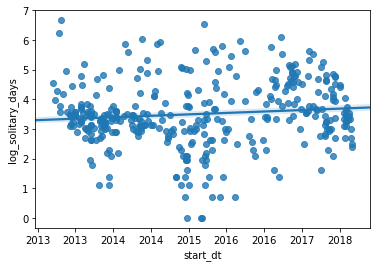

In [23]:
x=df.loc[:, 'start_dt'].astype(int)
y=df.loc[:,'log_solitary_days']

fig = plt.figure()
ax = fig.add_subplot(111)
sns.regplot(x, y)

xticks = ax.get_xticks()
xticks_dates = [pd.to_datetime(x).year for x in xticks]
ax.set_xticklabels(xticks_dates);

## Timeline

In [24]:
timeline = pd.date_range(min_date, max_date, freq='D')

In [25]:
years = timeline.year.unique()

In [26]:
counts = pd.Series(index=timeline)
for day in timeline:
    in_range = df[(df['start_dt'] <= day) & (df['end_dt'] >= day)]
    counts[day] = len(in_range)

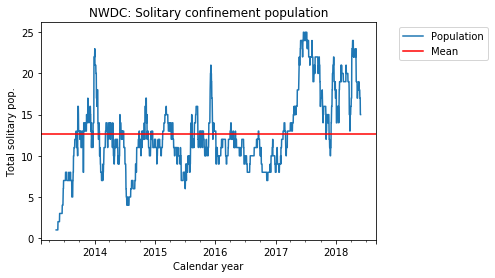

In [27]:
fig, ax = plt.subplots()
fig.figsize=(10,8)

ax = counts.plot();
ax.axhline(counts[min_date:max_date].mean(), color='r')
plt.title('NWDC: Solitary confinement population')
plt.xlabel('Calendar year')
plt.ylabel('Total solitary pop.')
leg = ax.legend(('Population', 'Mean'), loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()
fig.savefig('samplefigure', bbox_inches='tight')

In [28]:
counts.resample('AS').mean()

2013-01-01     9.600858
2014-01-01    11.101370
2015-01-01    11.876712
2016-01-01    10.295082
2017-01-01    16.923288
2018-01-01    18.794702
Freq: AS-JAN, dtype: float64

In [29]:
counts.mean()

12.686720867208672

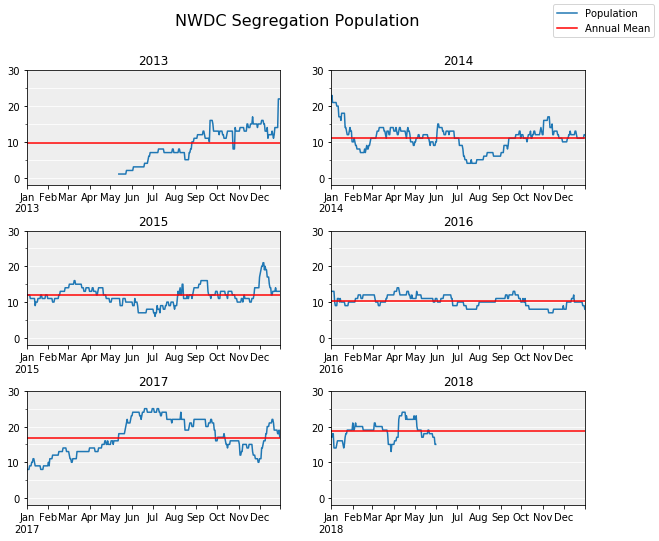

In [30]:
fig = plt.figure(figsize=(10,8))
i = 0
for year in years:
    ax=plt.subplot(3,2,i+1)

    ax.set_title(f'{year}')
    counts[f'{year}'].plot(ax=ax)
    datemin = pd.Timestamp(f'{year}-01-01')
    datemax = pd.Timestamp(f'{year}-12-31')
    ax.set_facecolor('#EEEEEE')
    ax.set_xlim([datemin, datemax])
    ax.set_ylim([-2,30])
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(NullLocator())
    ax.axhline(counts[f'{year}'].mean(), color='r')
    i = i + 1
    plt.grid(axis='y', which='minor', color='#FFFFFF')
plt.subplots_adjust(wspace=.2, hspace=.4)
fig.suptitle("NWDC Segregation Population", fontsize=16)
fig.legend(('Population', 'Annual Mean'), loc='upper right')
plt.show()

## Other characteristics

In [31]:
df.columns

Index(['Tracking Number', 'Alien Number', 'Last Name', 'First Name', 'Gender',
       'Date of Birth', 'Country of Citizenship', 'Facility AOR', 'Facility',
       'Facility:DETLOC', 'Report Type', 'Placement Date', 'Placement Reason',
       'Release Date', 'Length of Stay', 'Disciplinary Infraction',
       'Sanction Length', 'Detailed Reason', 'Attorney of Record',
       'Attorney Notification', 'Detainee Request',
       'Compliance with Detention Standards', 'Mental Illness',
       'Serious Medical Illness', 'Serious Disability', 'Ever SMI?',
       'FO Recommendation', 'Additional Comments Export',
       'Non Compliance Detail', 'Special Criteria', 'ID', 'Current Review',
       'Created', 'LGBTI', 'Item Type', 'Path', 'start_dt', 'end_dt',
       'solitary_length', 'solitary_days', 'log_solitary_days'],
      dtype='object')

In [32]:
placement_counts = df['Placement Reason'].value_counts()

In [33]:
placement_mean_days = df.groupby(['Placement Reason'])['solitary_days'].mean().sort_values(ascending=False)

In [34]:
placements = pd.concat([placement_counts, placement_mean_days], axis=1, sort=False)

In [35]:
placements = placements.rename({'Placement Reason': 'Total placements',
    'solitary_days': 'Av solitary length'}, axis=1)
placements.index.name = 'Solitary Placement Reason'
placements

,Total placements,Av solitary length
Solitary Placement Reason,,
Disciplinary,130,26.215385
Protective Custody: Other Detainee Safety,87,94.045977
Facility Security Threat: Other,37,54.216216
Facility Security Threat: Violent or Disruptive Behavior,25,79.360000
Protective Custody: Gang Status (Protective Custody Only),25,138.920000
Facility Security Threat: Gang Member Status (Not Protective Custody),19,68.526316
Mental Illness,9,41.666667
Medical: Observation,9,8.777778
Pending Investigation of Disciplinary Violation,8,6.750000


In [36]:
df.set_index('start_dt').groupby([pd.Grouper(freq='A'), 'Placement Reason'])['Tracking Number'].count().unstack().T

start_dt,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,2018-12-31 00:00:00
Placement Reason,,,,,,
Disciplinary,38.0,41.0,22.0,10.0,8.0,11.0
Facility Security Threat: Due to Seriousness of Criminal Conviction,NaN,1.0,1.0,NaN,NaN,NaN
Facility Security Threat: Gang Member Status (Not Protective Custody),3.0,7.0,8.0,NaN,1.0,NaN
Facility Security Threat: Other,NaN,7.0,3.0,2.0,12.0,13.0
Facility Security Threat: Violent or Disruptive Behavior,1.0,4.0,4.0,5.0,11.0,NaN
Hunger Strike,NaN,1.0,NaN,NaN,NaN,NaN
Medical: Observation,NaN,NaN,7.0,1.0,NaN,1.0
Medical: Other,1.0,1.0,2.0,NaN,NaN,NaN
Mental Illness,3.0,3.0,1.0,2.0,NaN,NaN


# Keyword search

Scanning text fields for keywords

In [134]:
keywords = ['incit', 'strike', ' work', 'hunger', 'tb ', 'flight', 'demon']

In [135]:
mask = df['Disciplinary Infraction'].apply(lambda x: any(word in str(x).lower() for word in keywords))
to_print = list(df[mask]['Tracking Number'])

In [136]:
mask = df['Additional Comments Export'].apply(lambda x: any(word in str(x).lower() for word in keywords))
to_print.extend(list(df[mask]['Tracking Number']))

In [137]:
mask = df['Placement Reason'].apply(lambda x: any(word in str(x).lower() for word in keywords))
to_print.extend(list(df[mask]['Tracking Number']))

In [138]:
to_print

[1592, 1591, 1590, 1468, 11588, 8461, 8410, 5529, 4738, 1662]

In [139]:
file1 = open("../output/comments.txt", 'w')

In [140]:
for i, row in df.iterrows():
    if row['Tracking Number'] in to_print:
        file1.write(str(row['Tracking Number']))
        file1.write('\n')
        file1.write(str(row['Placement Date']))
        file1.write('\n')
        file1.write(str(row['Placement Reason']))
        file1.write('\n')
        file1.write(str(row['Disciplinary Infraction']))
        file1.write('\n')
        file1.write(str(row['Additional Comments Export']))
        file1.write('\n\n')
    else:
        pass

In [109]:
df.set_index('Tracking Number').loc[to_print, :]

,Alien Number,Last Name,First Name,Gender,Date of Birth,Country of Citizenship,Facility AOR,Facility,Facility:DETLOC,Report Type,...,Current Review,Created,LGBTI,Item Type,Path,start_dt,end_dt,solitary_length,solitary_days,log_solitary_days
Tracking Number,,,,,,,,,,,,,,,,,,,,,
1592,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,...,14.0,4/10/2014,NaN,Item,(b)(7)(E),2014-03-27,2014-04-20,24 days,24.0,3.178054
1591,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,...,14.0,4/10/2014,NaN,Item,(b)(7)(E),2014-03-27,2014-04-21,25 days,25.0,3.218876
1590,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,...,14.0,4/10/2014,NaN,Item,(b)(7)(E),2014-03-28,2014-04-17,20 days,20.0,2.995732
1468,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,...,14.0,3/22/2014,NaN,Item,(b)(7)(E),2014-03-08,2014-03-24,16 days,16.0,2.772589
11943,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",VENEZUELA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,...,90.0,4/3/2018,NaN,Item,(b)(7)(E),2018-03-04,2018-05-26,83 days,83.0,4.418841
11588,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",CANADA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,...,120.0,2/20/2018,NaN,Item,(b)(7)(E),2018-02-05,2018-05-31,115 days,115.0,4.744932
8461,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Female,"(b)(6), (b)(7)(c )",MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,...,90.0,2/10/2017,NaN,Item,(b)(7)(E),2017-01-31,2017-05-16,105 days,105.0,4.653960
8410,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,...,90.0,2/3/2017,NaN,Item,(b)(7)(E),2017-01-10,2017-04-27,107 days,107.0,4.672829
5529,"(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )","(b)(6), (b)(7)(c )",Male,"(b)(6), (b)(7)(c )",MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,...,30.0,12/29/2015,NaN,Item,(b)(7)(E),2015-12-03,2016-01-05,33 days,33.0,3.496508


# Segregation by detainee request

In [45]:
detainee_request = df.set_index('start_dt').groupby(pd.Grouper(freq='A'))['Detainee Request'].value_counts(dropna=False).unstack()

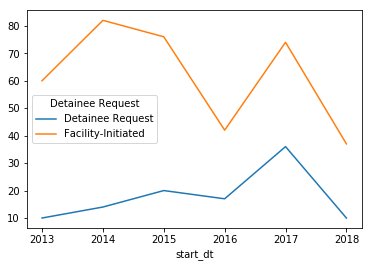

In [46]:
detainee_request.plot(stacked=True)

In [47]:
detainee_request.sum(axis=1)

start_dt
2013-12-31    60
2014-12-31    82
2015-12-31    76
2016-12-31    42
2017-12-31    74
2018-12-31    37
Freq: A-DEC, dtype: int64

In [48]:
detainee_request['Total'] = detainee_request.sum(axis=1)

In [49]:
detainee_request['Detainee Request %'] = detainee_request['Detainee Request']/detainee_request['Total']

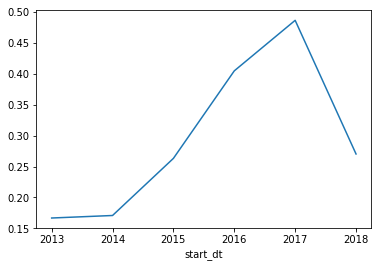

In [50]:
detainee_request['Detainee Request %'].plot()

In [51]:
df['Country of Citizenship'].value_counts().head()

MEXICO         194
CANADA          20
GUATEMALA       18
EL SALVADOR     17
SOMALIA         13
Name: Country of Citizenship, dtype: int64

In [52]:
print('Top 5 Placement Reasons (%)')
print('---------------------------------------------------')
print(df['Placement Reason'].value_counts(dropna=False).head(5) / len(df) * 100)

Top 5 Placement Reasons (%)
---------------------------------------------------
Disciplinary                                                 35.040431
Protective Custody: Other Detainee Safety                    23.450135
Facility Security Threat: Other                               9.973046
Protective Custody: Gang Status (Protective Custody Only)     6.738544
Facility Security Threat: Violent or Disruptive Behavior      6.738544
Name: Placement Reason, dtype: float64


In [53]:
print('Report Type count')
print('---------------------------------------------------')
print(df['Report Type'].value_counts(dropna=False))

Report Type count
---------------------------------------------------
30 Day Interval    327
14 Day              39
72 Hour              5
Name: Report Type, dtype: int64


In [54]:
print('Mental Illness count')
print('---------------------------------------------------')
print(df['Mental Illness'].value_counts(dropna=False))

Mental Illness count
---------------------------------------------------
No                        152
None                       85
Yes                        76
Mental Illness             40
Serious Mental Illness     18
Name: Mental Illness, dtype: int64


In [55]:
print('Detainee Request (%)')
print('---------------------------------------------------')
print(df['Detainee Request'].value_counts(dropna=False).head(5) / len(df) * 100)

Detainee Request (%)
---------------------------------------------------
Facility-Initiated    71.15903
Detainee Request      28.84097
Name: Detainee Request, dtype: float64
